In [1]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=66806a80998a73dabc91d3581e7c19aa573bf9c143ee1bcd544371c8fa77bbbe
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
pip install opencv-python-headless matplotlib

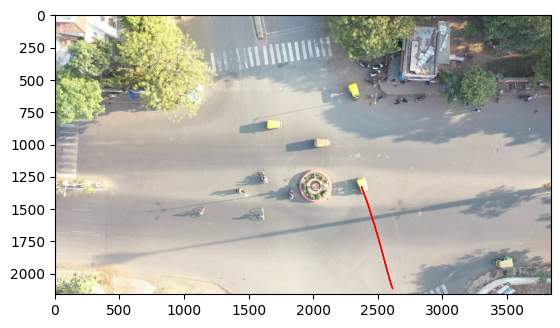

10      NaN
24       SE
39        S
54        S
69        S
       ... 
1718      S
1738      S
1758      S
1778     SE
1798      S
Name: direction, Length: 96, dtype: object


In [12]:
#Using Triangular membership functions

import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define fuzzy membership functions for the 8 directions (Triangular)
angles = np.linspace(-np.pi, np.pi, num=1000)

north = fuzz.trimf(angles, [-3*np.pi/4, -np.pi/2, -np.pi/4])
northeast =fuzz.trimf(angles, [-np.pi/2, -np.pi/4, 0])
east = fuzz.trimf(angles, [-np.pi/4, 0, np.pi/4])
southeast = fuzz.trimf(angles, [0, np.pi/4, np.pi/2])
south =fuzz.trimf(angles, [np.pi/4, np.pi/2, 3*np.pi/4])
southwest = fuzz.trimf(angles, [np.pi/2, 3*np.pi/4, np.pi])
west =  fuzz.trimf(angles, [3*np.pi/4, np.pi, 5*np.pi/4])
northwest = fuzz.trimf(angles, [-np.pi, -3*np.pi/4, -np.pi/2])

# Apply fuzzy logic to categorize the direction of motion
df['N'] = fuzz.interp_membership(angles, north, df['angle'])
df['NE'] = fuzz.interp_membership(angles, northeast, df['angle'])
df['E'] = fuzz.interp_membership(angles, east, df['angle'])
df['SE'] = fuzz.interp_membership(angles, southeast, df['angle'])
df['S'] = fuzz.interp_membership(angles, south, df['angle'])
df['SW'] = fuzz.interp_membership(angles, southwest, df['angle'])
df['W'] = fuzz.interp_membership(angles, west, df['angle'])
df['NW'] = fuzz.interp_membership(angles, northwest, df['angle'])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_triangular.csv', index=False)

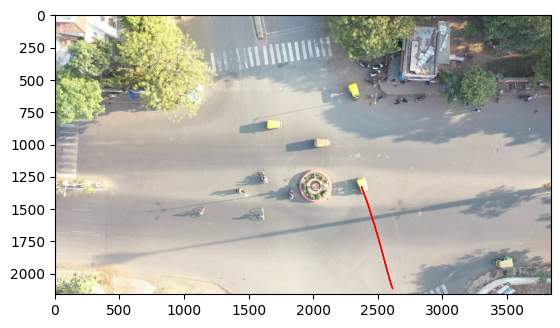

10      NaN
24       SE
39        S
54        S
69        S
       ... 
1718      S
1738      S
1758      S
1778     SE
1798      S
Name: direction, Length: 96, dtype: object


In [13]:
#Using Gaussian membership functions

import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define fuzzy membership functions for the 8 directions (Gaussian)

angles = np.linspace(-np.pi, np.pi, num=1000)

north = fuzz.gaussmf(angles, -np.pi/2, np.pi/4)
northeast =fuzz.gaussmf(angles, -np.pi/4, np.pi/4)
east =fuzz.gaussmf(angles, 0, np.pi/4)
southeast =fuzz.gaussmf(angles, np.pi/4, np.pi/4)
south =fuzz.gaussmf(angles, np.pi/2, np.pi/4)
southwest =fuzz.gaussmf(angles, 3*np.pi/4, np.pi/4)
west =fuzz.gaussmf(angles, np.pi, np.pi/4)
northwest =fuzz.gaussmf(angles, -3*np.pi/4, np.pi/4)

# Apply fuzzy logic to categorize the direction of motion
df['N'] = fuzz.interp_membership(angles, north, df['angle'])
df['NE'] = fuzz.interp_membership(angles, northeast, df['angle'])
df['E'] = fuzz.interp_membership(angles, east, df['angle'])
df['SE'] = fuzz.interp_membership(angles, southeast, df['angle'])
df['S'] = fuzz.interp_membership(angles, south, df['angle'])
df['SW'] = fuzz.interp_membership(angles, southwest, df['angle'])
df['W'] = fuzz.interp_membership(angles, west, df['angle'])
df['NW'] = fuzz.interp_membership(angles, northwest, df['angle'])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_gaussian.csv', index=False)

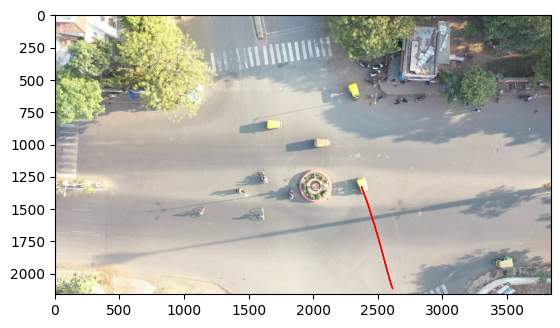

10      NaN
24        S
39        S
54        S
69        S
       ... 
1718      S
1738      S
1758      S
1778      S
1798      S
Name: direction, Length: 96, dtype: object


In [14]:
#Using trapezoidal  membership functions

import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the data into a pandas DataFrame
df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define fuzzy membership functions for the 8 directions (Trapezoidal)
angles = np.linspace(-np.pi, np.pi, num=1000)
north = fuzz.trapmf(angles, [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4])
northeast = fuzz.trapmf(angles, [-3*np.pi/4, -np.pi/2, -np.pi/4, 0])
east = fuzz.trapmf(angles, [-np.pi/2, -np.pi/4, 0, np.pi/4])
southeast = fuzz.trapmf(angles, [-np.pi/4, 0, np.pi/4, np.pi/2])
south = fuzz.trapmf(angles, [0, np.pi/4, np.pi/2, 3*np.pi/4])
southwest = fuzz.trapmf(angles, [np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
west = fuzz.trapmf(angles, [np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4])
northwest = fuzz.trapmf(angles, [3*np.pi/4, np.pi, 5*np.pi/4, 2*np.pi])

# Apply fuzzy logic to categorize the direction of motion
df['N'] = fuzz.interp_membership(angles, north, df['angle'])
df['NE'] = fuzz.interp_membership(angles, northeast, df['angle'])
df['E'] = fuzz.interp_membership(angles, east, df['angle'])
df['SE'] = fuzz.interp_membership(angles, southeast, df['angle'])
df['S'] = fuzz.interp_membership(angles, south, df['angle'])
df['SW'] = fuzz.interp_membership(angles, southwest, df['angle'])
df['W'] = fuzz.interp_membership(angles, west, df['angle'])
df['NW'] = fuzz.interp_membership(angles, northwest, df['angle'])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_trapezoidal.csv', index=False)


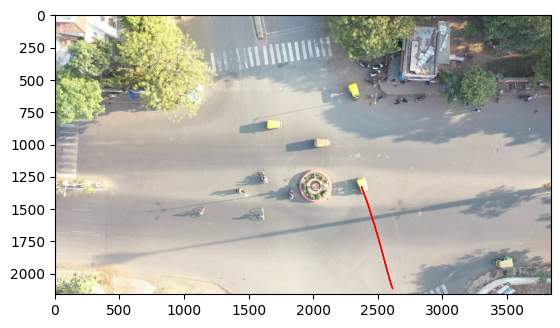

10      NaN
24       SW
39        W
54        W
69        W
       ... 
1718      W
1738      W
1758      W
1778     SW
1798      W
Name: direction, Length: 96, dtype: object


In [15]:
#Using Bell-shaped  membership functions

import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the data into a pandas DataFrame
df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define fuzzy membership functions for the 8 directions (Bell-shaped)
angles = np.linspace(-np.pi, np.pi, num=1000)
north = fuzz.gbellmf(angles, 1, 3, -np.pi)
northeast = fuzz.gbellmf(angles, 1, 3, -3*np.pi/4)
east = fuzz.gbellmf(angles, 1, 3, -np.pi/2)
southeast = fuzz.gbellmf(angles, 1, 3, -np.pi/4)
south = fuzz.gbellmf(angles, 1, 3, 0)
southwest = fuzz.gbellmf(angles, 1, 3, np.pi/4)
west = fuzz.gbellmf(angles, 1, 3, np.pi/2)
northwest = fuzz.gbellmf(angles, 1, 3, 3*np.pi/4)

# Apply fuzzy logic to categorize the direction of motion
df['N'] = fuzz.interp_membership(angles, north, df['angle'])
df['NE'] = fuzz.interp_membership(angles, northeast, df['angle'])
df['E'] = fuzz.interp_membership(angles, east, df['angle'])
df['SE'] = fuzz.interp_membership(angles, southeast, df['angle'])
df['S'] = fuzz.interp_membership(angles, south, df['angle'])
df['SW'] = fuzz.interp_membership(angles, southwest, df['angle'])
df['W'] = fuzz.interp_membership(angles, west, df['angle'])
df['NW'] = fuzz.interp_membership(angles, northwest, df['angle'])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_Bell-shaped.csv', index=False)


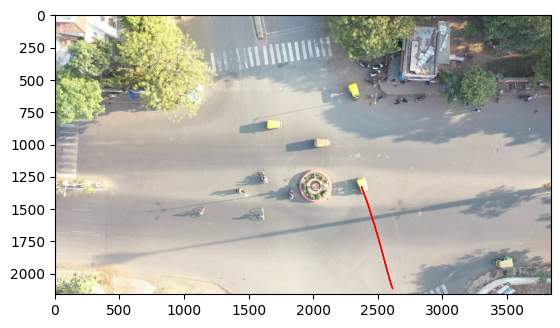

10      NaN
24        N
39        N
54        N
69        N
       ... 
1718      N
1738      N
1758      N
1778      N
1798      N
Name: direction, Length: 96, dtype: object


In [16]:
#Using Sigmoidal  membership functions
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the data into a pandas DataFrame
df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define fuzzy membership functions for the 8 directions (Sigmoidal)
angles = np.linspace(-np.pi, np.pi, num=1000)
north = fuzz.sigmf(angles, -np.pi, 1)
northeast = fuzz.sigmf(angles, -3*np.pi/4, 1)
east = fuzz.sigmf(angles, -np.pi/2, 1)
southeast = fuzz.sigmf(angles, -np.pi/4, 1)
south = fuzz.sigmf(angles, 0, 1)
southwest = fuzz.sigmf(angles, np.pi/4, 1)
west = fuzz.sigmf(angles, np.pi/2, 1)
northwest = fuzz.sigmf(angles, 3*np.pi/4, 1)

# Apply fuzzy logic to categorize the direction of motion
df['N'] = fuzz.interp_membership(angles, north, df['angle'])
df['NE'] = fuzz.interp_membership(angles, northeast, df['angle'])
df['E'] = fuzz.interp_membership(angles, east, df['angle'])
df['SE'] = fuzz.interp_membership(angles, southeast, df['angle'])
df['S'] = fuzz.interp_membership(angles, south, df['angle'])
df['SW'] = fuzz.interp_membership(angles, southwest, df['angle'])
df['W'] = fuzz.interp_membership(angles, west, df['angle'])
df['NW'] = fuzz.interp_membership(angles, northwest, df['angle'])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_Sigmoidal.csv', index=False)


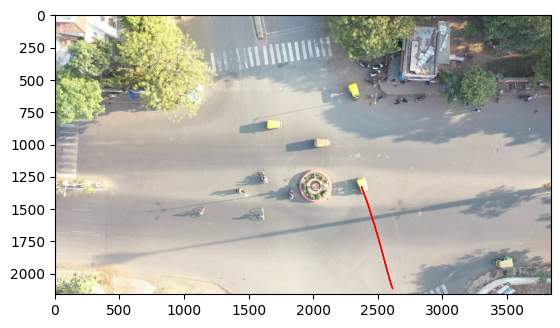

10      NaN
24        S
39        S
54        S
69        S
       ... 
1718      S
1738      S
1758      S
1778      S
1798      S
Name: direction, Length: 96, dtype: object


In [9]:
#Using Piecewise Linear membership functions
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the data into a pandas DataFrame
df = pd.read_csv('Trkwise_Framewise.csv.csv')

# Select a specific track
track_id = 1   # replace with your track id
df = df[df['Track'] == track_id]

# Calculate the difference in centroids between consecutive frames
df['dx'] = df['xc'].diff()
df['dy'] = df['yc'].diff()

# Calculate the angle of motion
df['angle'] = np.arctan2(df['dy'], df['dx'])

# Define piecewise linear membership functions for the 8 directions
angles = np.linspace(-np.pi, np.pi, num=1000)

# Define the points for each piecewise linear function for all directions
north_points = [(-np.pi, 0), (-3*np.pi/4, 1), (-np.pi/2, 1), (-np.pi/4, 0)]
northeast_points = [(-3*np.pi/4, 0), (-np.pi/2, 1), (-np.pi/4, 1), (0, 0)]
east_points = [(-np.pi/2, 0), (-np.pi/4, 1), (0, 1), (np.pi/4, 0)]
southeast_points = [(-np.pi/4, 0), (0, 1), (np.pi/4, 1), (np.pi/2, 0)]
south_points = [(0, 0), (np.pi/4, 1), (np.pi/2, 1), (3*np.pi/4, 0)]
southwest_points = [(np.pi/4, 0), (np.pi/2, 1), (3*np.pi/4, 1), (np.pi, 0)]
west_points = [(np.pi/2, 0), (3*np.pi/4, 1), (np.pi, 1), (-3*np.pi/4, 0)]
northwest_points = [(3*np.pi/4, 0), (np.pi, 1), (-3*np.pi/4, 1), (-np.pi, 0)]

# Interpolate membership values for each direction
df['N'] = np.interp(df['angle'], [point[0] for point in north_points], [point[1] for point in north_points])
df['NE'] = np.interp(df['angle'], [point[0] for point in northeast_points], [point[1] for point in northeast_points])
df['E'] = np.interp(df['angle'], [point[0] for point in east_points], [point[1] for point in east_points])
df['SE'] = np.interp(df['angle'], [point[0] for point in southeast_points], [point[1] for point in southeast_points])
df['S'] = np.interp(df['angle'], [point[0] for point in south_points], [point[1] for point in south_points])
df['SW'] = np.interp(df['angle'], [point[0] for point in southwest_points], [point[1] for point in southwest_points])
df['W'] = np.interp(df['angle'], [point[0] for point in west_points], [point[1] for point in west_points])
df['NW'] = np.interp(df['angle'], [point[0] for point in northwest_points], [point[1] for point in northwest_points])

# Choose the direction with the highest membership value
df['direction'] = df[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']].idxmax(axis=1)

# Plot the prediction on an image with a line
fig, ax = plt.subplots()
img = mpimg.imread('9.jpg')
ax.imshow(img)

# Draw lines between consecutive frames
for i in range(1, len(df)):
    ax.add_patch(patches.Arrow(df.iloc[i-1]['xc'], df.iloc[i-1]['yc'], df.iloc[i]['dx'], df.iloc[i]['dy'], color='red'))

plt.show()
print(df['direction'])
df.to_csv('output_Piecewise Linear.csv', index=False)

